In [3]:
%%bash
python3.11 -m pip install ipykernel
python3.11 -m ipykernel install --user --name=python311 --display-name "Python 3.11"



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Installed kernelspec python311 in /Users/ctrlair/Library/Jupyter/kernels/python311


In [1]:
import sys

print(sys.executable)
!pip show matplotlib


/usr/local/bin/python3
Name: matplotlib
Version: 3.10.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative works, distribute, and otherwise use matplotlib
 alone or in any derivative version, provided, however, that MDT's
 License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
 2012- Matplotlib Development Team; All Rights Reserved" are 

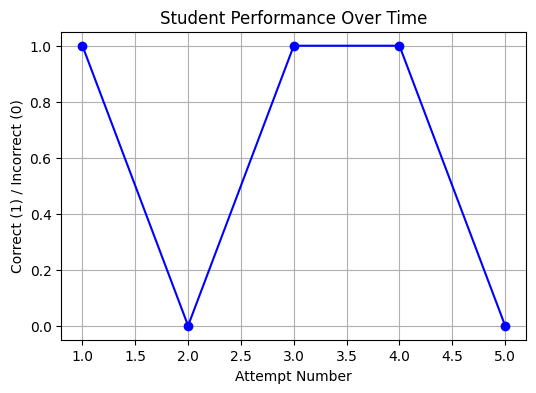

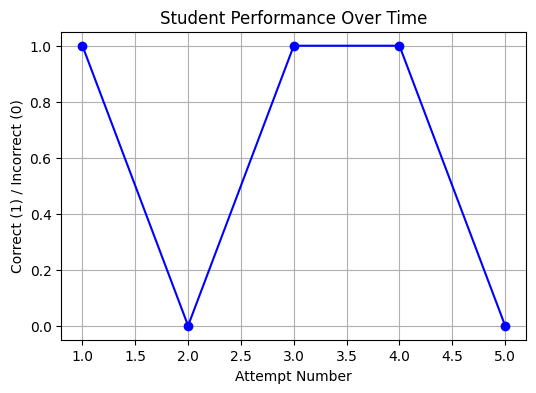

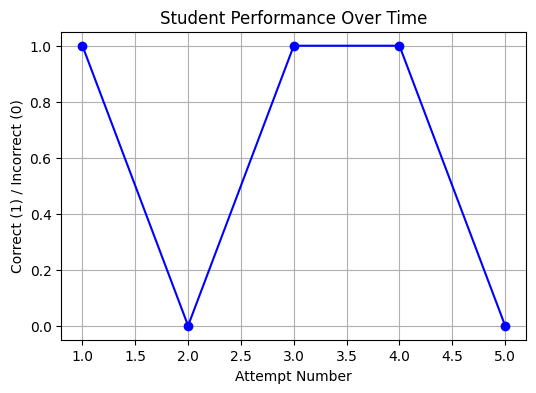

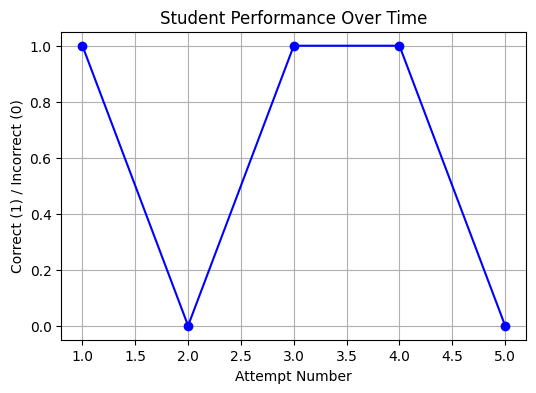

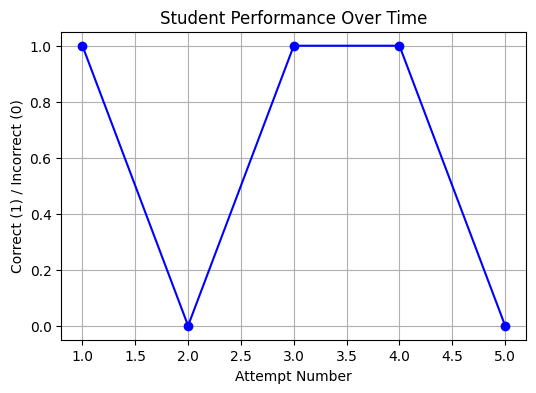

In [ ]:
import tkinter as tk
from tkinter import messagebox
import random
import matplotlib.pyplot as plt

# Vocabulary Questions (Expanded)
# This list contains words with synonyms, antonyms, and meanings.
questions = [
    {"question": "What is the synonym of 'Happy'?", "options": ["Sad", "Joyful", "Angry", "Tired"], "answer": "Joyful", "explanation": "'Joyful' means happy."},
    {"question": "What is the antonym of 'Fast'?", "options": ["Quick", "Slow", "Swift", "Rapid"], "answer": "Slow", "explanation": "'Slow' is the opposite of 'Fast'."},
    {"question": "Which word means 'to eat quickly'?", "options": ["Devour", "Sip", "Nod", "Munch"], "answer": "Devour", "explanation": "'Devour' means to eat greedily or quickly."},
    {"question": "What is the synonym of 'Big'?", "options": ["Tiny", "Huge", "Small", "Narrow"], "answer": "Huge", "explanation": "'Huge' is another word for 'Big'."},
    {"question": "What is the meaning of 'Ponder'?", "options": ["Think deeply", "Run fast", "Shout loudly", "Ignore"], "answer": "Think deeply", "explanation": "'Ponder' means to think deeply about something."}
]

# Advanced Vocabulary Questions (More difficult words for higher-level students)
advanced_questions = [
    {"question": "What is the meaning of 'Ebullient'?", "options": ["Sad", "Energetic", "Tired", "Dull"], "answer": "Energetic", "explanation": "'Ebullient' means full of energy and enthusiasm."},
    {"question": "What is the synonym of 'Ephemeral'?", "options": ["Short-lived", "Eternal", "Strong", "Weak"], "answer": "Short-lived", "explanation": "'Ephemeral' means lasting for a very short time."}
]

# Student Performance Tracking
student_model = {"correct": 0, "incorrect": 0, "history": []}  # Keeps track of answers for progress tracking

# Function to update student performance
def update_student_model(is_correct):
    if is_correct:
        student_model['correct'] += 1
    else:
        student_model['incorrect'] += 1
    student_model['history'].append(1 if is_correct else 0)

# Function to get the next question based on student performance
def get_next_question():
    if student_model['correct'] > student_model['incorrect']:
        return random.choice(advanced_questions)  # Increases difficulty if student is doing well
    else:
        return random.choice(questions)  # Keeps it simple if struggling

# Function to handle user input
def submit_answer():
    selected_option = var.get()
    if selected_option == "":
        messagebox.showwarning("Warning", "Please select an answer!")
        return
    
    current_question = questions_label["text"]
    question_data = next(q for q in questions + advanced_questions if q["question"] == current_question)

    if selected_option == question_data["answer"]:
        update_student_model(True)
        messagebox.showinfo("Correct!", "✅ Well done! That’s the right answer.")
    else:
        update_student_model(False)
        messagebox.showerror("Incorrect!", f"❌ Oops! The correct answer was: {question_data['answer']}.
Explanation: {question_data['explanation']}")
    
    ask_question()

# Function to ask a new question
def ask_question():
    new_question = get_next_question()
    questions_label["text"] = new_question["question"]
    
    for i, option in enumerate(new_question["options"]):
        radio_buttons[i].config(text=option, value=option)
    
    var.set("")  # Reset the selected option

# Function to show student performance summary
def show_summary():
    messagebox.showinfo(
        "Performance Summary",
        f"Final Score:\n✅ Correct: {student_model['correct']}\n❌ Incorrect: {student_model['incorrect']}"
    )
    plot_performance()

# Function to plot student progress
def plot_performance():
    attempts = list(range(1, len(student_model['history']) + 1))
    
    plt.figure(figsize=(6, 4))
    plt.plot(attempts, student_model['history'], marker='o', linestyle='-', color='b')
    plt.title('Student Performance Over Time')
    plt.xlabel('Attempt Number')
    plt.ylabel('Correct (1) / Incorrect (0)')
    plt.grid(True)
    plt.show()

# Function to provide feedback based on performance
def give_feedback():
    correct = student_model['correct']
    incorrect = student_model['incorrect']

    if correct > incorrect:
        messagebox.showinfo("Feedback", "🎉 Great job! You’re improving! Try using new words in sentences.")
    else:
        messagebox.showinfo("Feedback", "📚 Keep practicing! Try reviewing the explanations carefully.")
    
    if incorrect > 0:
        incorrect_questions = [q for q in questions + advanced_questions if q["answer"] not in student_model['history']]
        if incorrect_questions:
            suggested_word = random.choice(incorrect_questions)
            messagebox.showinfo("Word to Study", f"📝 Suggested word to review: {suggested_word['answer']}\nMeaning: {suggested_word['explanation']}")

# GUI Setup
root = tk.Tk()
root.title("English Vocabulary ITS")
root.geometry("500x450")

# Display question
questions_label = tk.Label(root, text="", font=("Arial", 14), wraplength=400, justify="center")
questions_label.pack(pady=20)

# Create answer choices as radio buttons
var = tk.StringVar()
radio_buttons = []
for _ in range(4):
    rb = tk.Radiobutton(root, text="", variable=var, value="", font=("Arial", 12))
    rb.pack(anchor="w", padx=20)
    radio_buttons.append(rb)

# Buttons for interaction
submit_btn = tk.Button(root, text="Submit Answer", font=("Arial", 12), command=submit_answer)
submit_btn.pack(pady=10)

summary_btn = tk.Button(root, text="Show Summary", font=("Arial", 12), command=show_summary)
summary_btn.pack(pady=5)

feedback_btn = tk.Button(root, text="Get Feedback", font=("Arial", 12), command=give_feedback)
feedback_btn.pack(pady=5)

# Ask the first question
ask_question()

# Run the GUI loop
root.mainloop()
```

